In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

### Visualize

In [ ]:
audio_file = 'test/audio/chunks/recorded_audio_20230918_015105.wav'
audio, sample_rate = librosa.load(audio_file, sr=None)

# Plot the normalized audio waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sample_rate)
plt.title("Normalized Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

#### Create Spectrogram

In [ ]:
plt.figure(figsize=(12, 6))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Normalized Audio")
plt.show()

#### Pitch variation

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_file = 'test/audio/chunks/recorded_audio_20230918_015105.wav'  # Replace with the path to your audio file
y, sr = librosa.load(audio_file, sr=None)

# Calculate the pitch variation
pitch, magnitudes = librosa.piptrack(y=y, sr=sr)
mean_pitch = pitch[pitch > 0].mean()

# Calculate the intensity variation
intensity = librosa.feature.rms(y=y)

# Plot the pitch and intensity
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(magnitudes, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Pitch Variation (Mean Pitch: {mean_pitch:.2f} Hz)')

plt.tight_layout()
plt.show()

### -------------------------------------------
### UPDATED CLUSTERING
### -------------------------------------------

In [3]:
import src.utils.audio_utils as audio_utils
import modules.pyannote as pyannote
import modules.whisper as whisper
import src.utils.system_utils as system_utils
import os

In [ ]:
transcription_model  = whisper.load_model()

In [ ]:
#audio_utils.start_continuous_recording(True, False)

In [4]:
DOTENV_PATH = './venv/env_variables.env'
PYANNOTE_ACCESS_TOKEN = pyannote.get_pyannote_access_token(DOTENV_PATH)

In [5]:
pyannote_pipeline = pyannote.get_pyannote_pipeline(pyannote_access_token=PYANNOTE_ACCESS_TOKEN)

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
torchvision is not available - cannot save figures
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.0.7. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\adamb\.cache\torch\pyannote\models--pyannote--segmentation\snapshots\c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b\pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.1+cpu. Bad things might happen unless you revert torch to 1.x.


#### Speech activity detection demo

In [6]:
audio = 'enhanced_audio/temp/test.wav'
audio1 = 'enhanced_audio/silent_speech/recorded_audio_20230924_223955.wav'
audio2 = 'enhanced_audio/silent_speech/recorded_audio_20230924_224352.wav'

speech_activity = audio_utils.speech_exists(audio1)
speech_activity

False

In [7]:
embedding_model = pyannote.get_embedding_model(PYANNOTE_ACCESS_TOKEN)

Lightning automatically upgraded your loaded checkpoint from v1.2.7 to v2.0.7. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\adamb\.cache\torch\pyannote\models--pyannote--embedding\snapshots\ef54f1b59c9fbef89ea2bab0e27b4a5dd9cfce36\pytorch_model.bin`
Lightning automatically upgraded your loaded checkpoint from v1.2.7 to v2.0.7. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\adamb\.cache\torch\pyannote\models--pyannote--embedding\snapshots\ef54f1b59c9fbef89ea2bab0e27b4a5dd9cfce36\pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.0.1+cpu. Bad things might happen unless you revert torch to 1.x.
Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.0.1+cpu. Bad things might happen unless you revert torch to 1.x.


#### Clustering example

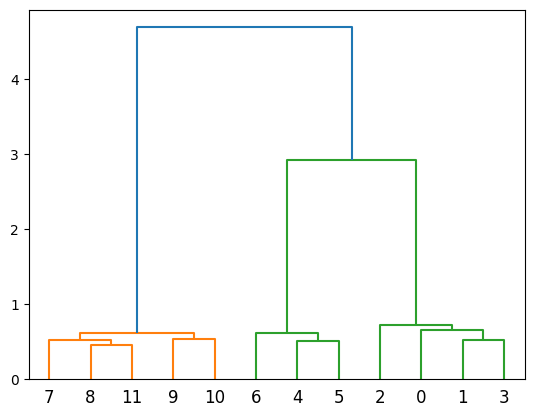

cluster:  3   ['enhanced_audio/non_silent/crop_at_end_recorded_audio_20230907_223245_s1.wav_SPEAKER_00__0_20230908_174952.wav', 'enhanced_audio/non_silent/crop_at_end_recorded_audio_20230907_223255_s1.wav_SPEAKER_00__1_20230908_175101.wav', 'enhanced_audio/non_silent/crop_at_end_recorded_audio_20230907_223305_s1.wav_SPEAKER_00__1_20230908_175112.wav', 'enhanced_audio/non_silent/crop_at_end_recorded_audio_20230907_223315_s1.wav_SPEAKER_00__0_20230908_175049.wav'] 

cluster:  2   ['enhanced_audio/non_silent/crop_at_end_recorded_audio_20230907_223415_s2.wav_SPEAKER_00__1_20230908_175057.wav', 'enhanced_audio/non_silent/crop_at_end_recorded_audio_20230907_223425_s2.wav_SPEAKER_00__1_20230908_175053.wav', 'enhanced_audio/non_silent/crop_at_end_recorded_audio_20230907_223435_s2.wav_SPEAKER_00__1_20230908_175108.wav'] 

cluster:  1   ['enhanced_audio/non_silent/crop_at_end_recorded_audio_20230908_133604_s3.wav_SPEAKER_00__2_20230908_175120.wav', 'enhanced_audio/non_silent/crop_at_end_recorded

In [13]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from models.cluster_point import ClusterPoint

CLUSTER_ROOT = 'enhanced_audio/non_silent/'#'enhanced_audio/test_clips/'

def init_embeddings_cluster(CLUSTER_ROOT, embedding_model):
    cluster_point = ClusterPoint()
    cluster_files = os.listdir(CLUSTER_ROOT) 
    embeddings_dict = {}
    for i, file in enumerate(cluster_files):
        file_path = os.path.join(CLUSTER_ROOT, file)
        if file_path not in embeddings_dict:
            embeddings_dict[file_path] = pyannote.get_speaker_embedding_vector(embedding_model, file_path)

    embedding_arrays = np.array(list(embeddings_dict.values()))
    cosine_similarity_matrix = cosine_similarity(embedding_arrays, embedding_arrays)

    # Compute linkage matrix
    linkage_matrix = linkage(1 - cosine_similarity_matrix, method='ward')

    # Create a dendrogram
    dendrogram(linkage_matrix)

    # Plot the dendrogram (optional)
    import matplotlib.pyplot as plt
    plt.show()

        # Set a threshold or number of clusters based on your visual inspection
    threshold = 1.4  # Adjust this value as needed

    # Cut the dendrogram to obtain cluster labels
    cluster_labels = fcluster(linkage_matrix, t=threshold, criterion='distance')
    cluster_labels

    # Create a dictionary to associate file names with cluster labels
    clustered_data = {}
    clustered_embeddings = {}
    for i, (file_name, embedding) in enumerate(embeddings_dict.items()):
        cluster_label = cluster_labels[i]
        if cluster_label not in clustered_data:
            clustered_data[cluster_label] = []
            clustered_embeddings[cluster_label] = []
        clustered_data[cluster_label].append(file_name)
        clustered_embeddings[cluster_label].append(embedding)
        
        #system_utils.delete_specific_file(file_name)

    # Now, clustered_data contains clusters as keys and lists of file names as values
    for i in clustered_data:
        print("cluster: ", i, " ",clustered_data[i],"\n")
    
    return clustered_embeddings

clustered_embeddings = init_embeddings_cluster(CLUSTER_ROOT, embedding_model)